In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import seaborn as sns
%matplotlib inline

# 解决pyplot绘图中文乱码问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']= False
# sns.set(rc={"figure.figsize": (10, 6), "font.sans-serif": "SimHei", "axes.unicode_minus": False})

In [2]:
lg_df = pd.read_csv("lagou.csv")

In [3]:
lg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 17 columns):
city                 2505 non-null object
companyFullName      2505 non-null object
companyLabelList     2505 non-null object
companySize          2504 non-null object
education            2505 non-null object
financeStage         2504 non-null object
firstType            2505 non-null object
industryField        2504 non-null object
jobNature            2505 non-null object
latitude             2493 non-null float64
longitude            2493 non-null float64
positionAdvantage    2505 non-null object
positionId           2505 non-null int64
positionLables       2505 non-null object
positionName         2505 non-null object
salary               2505 non-null object
workYear             2505 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 332.8+ KB


In [4]:
lg_df.head()

,city,companyFullName,companyLabelList,companySize,education,financeStage,firstType,industryField,jobNature,latitude,longitude,positionAdvantage,positionId,positionLables,positionName,salary,workYear
0,上海,德佑房地产经纪有限公司,"['技能培训', '带薪年假', '年度旅游', '岗位晋升']",500-2000人,本科,B轮,市场与销售,企业服务,全职,31.230434,121.463097,大数据 大挑战 有竞争力的薪资,1735598,['大数据'],数据分析专家,20k-30k,5-10年
1,杭州,浙江日报报业集团,"['带薪年假', '美女多', '定期体检', '人才公寓']",2000人以上,本科,不需要融资,开发/测试/运维类,"移动互联网,文化娱乐",全职,29.993662,119.993591,"五险一金,绩效奖金,通讯补贴,餐补",2780066,[],运营数据分析师,8k-15k,1-3年
2,北京,杏树林信息技术（北京）有限公司,"['A类人才', '股票期权', '带薪年假', '年度旅游']",150-500人,大专,C轮,开发/测试/运维类,"移动互联网,医疗健康",全职,39.893135,116.447045,"氛围好,追求卓越,免费三餐,免费下午茶",3690416,"['医疗健康', '大数据', '二次元', '活动运营']",数据分析师-医疗,10k-20k,1-3年
3,北京,支付宝(杭州)信息技术有限公司,"['年底双薪', '带薪年假', '股票期权', '绩效奖金']",2000人以上,本科,B轮,开发/测试/运维类,"金融,移动互联网",全职,39.993252,116.473198,"核心事业部,顶级的技术,大牛云集,学习晋升快",3692688,"['搜索', '机器学习', '数据图谱']",高德-NLP/推荐算法/数据挖掘/数据分析/图谱,25k-50k,3-5年
4,北京,优舫（北京）信息科技有限公司,"['绩效奖金', '通讯津贴', '带薪年假', '交通补助']",2000人以上,本科,D轮及以上,开发/测试/运维类,"电子商务,移动互联网",全职,39.991772,116.473585,福利待遇佳、企业平台好、晋升空间大,4083696,"['数据挖掘', '用户行为分析']",资深数据分析师-北京-13343,20k-30k,5-10年


Text(0.5,1,'岗位数量 Vs 城市')

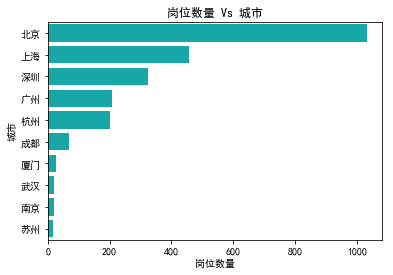

In [14]:
# 哪个城市的数据分析岗位最多？
top_ten_city = lg_df.groupby('city', as_index=False)['companyFullName'].count().sort_values(by="companyFullName", ascending=False)[:10]
sns.barplot(data=top_ten_city, y="city", x="companyFullName", color="c")
plt.xlabel('岗位数量')
plt.ylabel('城市')
plt.title("岗位数量 Vs 城市")

In [36]:
# 处理薪资数据，将其转成具体数据取平均
def parse_salary(salary):
    if "-" in salary:
        salary = salary.replace("k", "").replace("K", "")
    else:
        salary = salary.split("k")[0]
    try:
        min_s = salary.split("-")[0]
        max_s = salary.split("-")[1]
        return ((int(min_s) + int(max_s)) * 1000) / 2
    except IndexError:
        return int(salary) * 1000

lg_df["salary_sp"] = lg_df["salary"].apply(parse_salary)

In [37]:
lg_city = lg_df.query('["北京","上海","深圳", "广州", "杭州", "成都", "厦门", "武汉", "南京", "苏州"] in city')

In [38]:
lg_city.head()

,city,companyFullName,companyLabelList,companySize,education,financeStage,firstType,industryField,jobNature,latitude,longitude,positionAdvantage,positionId,positionLables,positionName,salary,workYear,salary_sp
0,上海,德佑房地产经纪有限公司,"['技能培训', '带薪年假', '年度旅游', '岗位晋升']",500-2000人,本科,B轮,市场与销售,企业服务,全职,31.230434,121.463097,大数据 大挑战 有竞争力的薪资,1735598,['大数据'],数据分析专家,20k-30k,5-10年,25000.0
1,杭州,浙江日报报业集团,"['带薪年假', '美女多', '定期体检', '人才公寓']",2000人以上,本科,不需要融资,开发/测试/运维类,"移动互联网,文化娱乐",全职,29.993662,119.993591,"五险一金,绩效奖金,通讯补贴,餐补",2780066,[],运营数据分析师,8k-15k,1-3年,11500.0
2,北京,杏树林信息技术（北京）有限公司,"['A类人才', '股票期权', '带薪年假', '年度旅游']",150-500人,大专,C轮,开发/测试/运维类,"移动互联网,医疗健康",全职,39.893135,116.447045,"氛围好,追求卓越,免费三餐,免费下午茶",3690416,"['医疗健康', '大数据', '二次元', '活动运营']",数据分析师-医疗,10k-20k,1-3年,15000.0
3,北京,支付宝(杭州)信息技术有限公司,"['年底双薪', '带薪年假', '股票期权', '绩效奖金']",2000人以上,本科,B轮,开发/测试/运维类,"金融,移动互联网",全职,39.993252,116.473198,"核心事业部,顶级的技术,大牛云集,学习晋升快",3692688,"['搜索', '机器学习', '数据图谱']",高德-NLP/推荐算法/数据挖掘/数据分析/图谱,25k-50k,3-5年,37500.0
4,北京,优舫（北京）信息科技有限公司,"['绩效奖金', '通讯津贴', '带薪年假', '交通补助']",2000人以上,本科,D轮及以上,开发/测试/运维类,"电子商务,移动互联网",全职,39.991772,116.473585,福利待遇佳、企业平台好、晋升空间大,4083696,"['数据挖掘', '用户行为分析']",资深数据分析师-北京-13343,20k-30k,5-10年,25000.0


Text(0.5,1,'薪资分布')

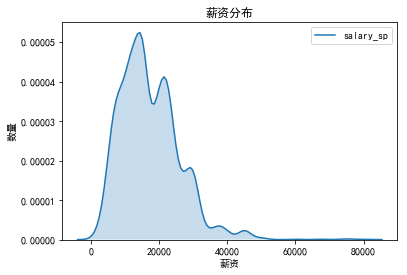

In [8]:
%matplotlib inline
# sns.distplot(lg_df.salary_sp)
# sns.distplot(lg_df.salary_sp,hist=True, kde=True, rug=False)
# sns.rugplot(lg_df.salary_sp)
sns.kdeplot(lg_df.salary_sp, shade=True)
plt.xlabel("薪资")
plt.ylabel('数量')
plt.title('薪资分布')

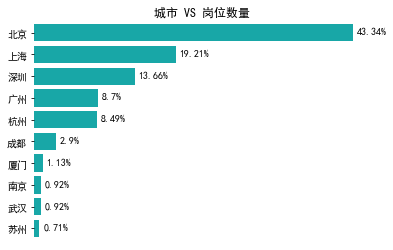

In [99]:
city_counts = lg_city.groupby('city', as_index=False)['companyFullName'].count().sort_values(by="companyFullName", ascending=False)
g1 = sns.barplot(x="companyFullName", y="city", data=city_counts, color='c',estimator=lambda x: sum(x)*100/city_counts['companyFullName'].sum())
rects1 = g1.patches

for rect in rects1:
    height = rect.get_height()
    width = rect.get_width()
    g1.text(x=rect.get_width()+0.5, y=(rect.get_y()+height/1.7), s=str(round(rect.get_width(),2))+"%")
plt.xlabel("")
plt.ylabel("")
plt.title("城市 VS 岗位数量")
g1.set_xticks([], minor=False)
sns.despine(bottom=True, left=True)


In [10]:
city_counts['companyFullName'].sum()

2379

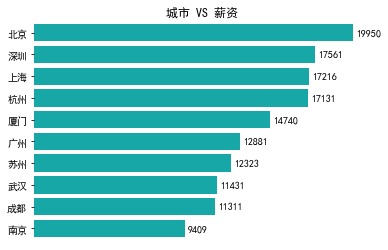

In [102]:
# 平均薪资排名前十的城市
salary_summary = lg_city.groupby("city", as_index=False)["salary_sp"].mean().sort_values(by="salary_sp", ascending=False)
# top_ten_salary.sort_values().plot(kind="barh")
g2 = sns.barplot(y='city', x='salary_sp', data=salary_summary, color="c")
rects = g2.patches
# labels = ["label%d" % i for i in range(len(rects))]
for rect in rects:
    height = rect.get_height()
    width = rect.get_width()
    g2.text(x=rect.get_width()+200, y=(rect.get_y()+height/1.5), s=int(rect.get_width()))
plt.xlabel(s="")
plt.ylabel(s="")
plt.title("城市 VS 薪资")
g2.set_xticks([], minor=False)
sns.despine(bottom=True, left=True)

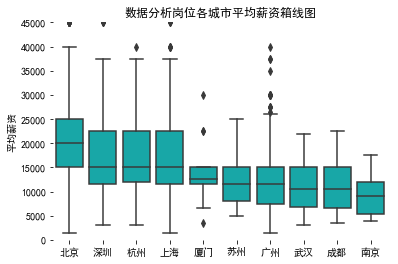

In [29]:
sns.boxplot(x="city", y="salary_sp", data=lg_city, order=lg_city.groupby("city")['salary_sp'].median().sort_values(ascending=False).keys(), color="c")
plt.ylim(0, 45000)
plt.xlabel("")
plt.ylabel("平均薪资")
plt.title("数据分析岗位各城市平均薪资箱线图")
sns.despine(bottom=True,left=True)

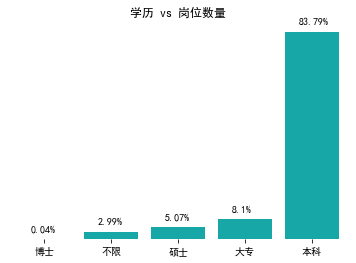

In [103]:
# 数据分析岗位所需学位
education_count = lg_df.groupby("education",as_index=False)["companyFullName"].count()
g3 = sns.barplot(x="education", y="companyFullName", data=education_count.sort_values(by="companyFullName"),
                 color='c', estimator=lambda x:sum(x)*100/education_count["companyFullName"].sum())
rects3 = g3.patches
for rect in rects3:
    height = rect.get_height()
    width = rect.get_width()
    g3.text(x=rect.get_x()+0.2, y=height+3, s=str(round(height,2))+"%")

plt.xlabel("")
g3.set_yticks([], minor=False)
plt.ylabel('')
plt.title("学历 vs 岗位数量")
sns.despine(bottom=True, left=True)

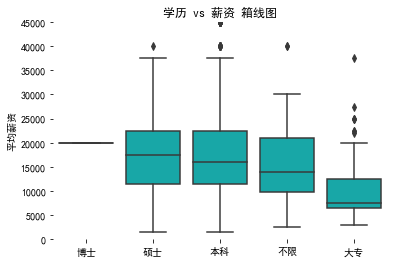

In [34]:
sns.boxplot(x="education", y="salary_sp", data=lg_df,
            order=lg_df.groupby("education")["salary_sp"].median().sort_values(ascending=False).keys(), color="c")
plt.ylim(0,45000)
plt.xlabel("")
plt.ylabel("平均薪资")
plt.title("学历 vs 薪资 箱线图")
sns.despine(bottom=True, left=True)

In [39]:
def parse_workYear(workYear):
    if workYear == "应届毕业生" or workYear == "不限" or workYear == "1年以下":
        return "小于1年"
    else:
        return workYear

lg_df["workYear_sp"] = lg_df["workYear"].apply(parse_workYear)

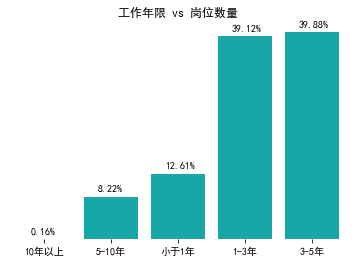

In [104]:
# 工作年限
education_count = lg_df.groupby("workYear_sp",as_index=False)["companyFullName"].count()
g4 = sns.barplot(x="workYear_sp", y="companyFullName", data=education_count.sort_values(by="companyFullName"), color='c',
            estimator=lambda x : sum(x)*100 / education_count['companyFullName'].sum())
plt.xlabel("")
plt.ylabel("")
plt.title("工作年限 vs 岗位数量")
g4.set_yticks([], minor=False)
sns.despine(bottom=True, left=True)
rects4 = g4.patches
for rect in rects4:
    height = rect.get_height()
    width = rect.get_width()
    g4.text(x=rect.get_x()+0.2, y=height+1, s=str(round(height,2))+"%")

Text(0.5,1,'工作年薪 vs 薪资 箱线图')

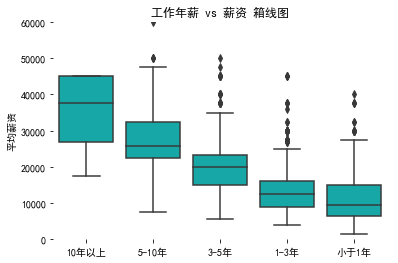

In [68]:
sns.boxplot(x="workYear_sp", y="salary_sp", data=lg_df,
            order=lg_df.groupby("workYear_sp")["salary_sp"].median().sort_values(ascending=False).keys(), color="c")
plt.ylim(0,60000)
plt.xlabel("")
plt.ylabel("平均薪资")
sns.despine(bottom=True, left=True)
plt.title("工作年薪 vs 薪资 箱线图")

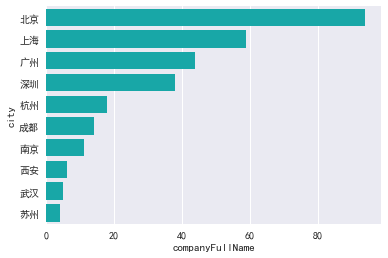

In [38]:
work_year_city = lg_df.groupby(["city","workYear_sp"], as_index=False)["companyFullName"].count()
work_year_ig = work_year_city[work_year_city["workYear_sp"] == "应届&不限"].sort_values(by="companyFullName", ascending=False)[:10]
sns.barplot(x="companyFullName", y="city",data=work_year_ig, color="c")


In [48]:
# 行业分析
# 公司行业描述一般有两个词语，有的一个词语
fields = [str(field).replace("、", " ").replace(",", " ").split(" ") for field in lg_df.industryField]
def count_tags(fields):
    tags = {}
    for field in fields:
        for i in field:
            if i:
                if i not in tags:
                    tags[i] = 1
                else:
                    tags[i] += 1
    return tags

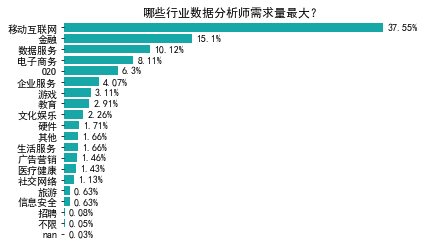

In [82]:
tags = count_tags(fields)
tags_df = pd.DataFrame(list(tags.items()), columns=['行业', '数量']).sort_values(by='数量',ascending=False) # 字典转成DataFrame, 在python3 中 使用 list(tags.items())
g5 = sns.barplot(data=tags_df, x="数量", y='行业', color='c',estimator=lambda x: sum(x)*100 / tags_df["数量"].sum())
plt.xlabel("")
plt.ylabel("")
plt.title('哪些行业数据分析师需求量最大？')
sns.despine(bottom=True, left=True)
g5.set_xticks([],minor=False)
rects5 = g5.patches

for rect in rects5:
    height = rect.get_height()
    width = rect.get_width()
    g5.text(x=rect.get_width()+0.5, y=(rect.get_y()+height/1.2), s=str(round(rect.get_width(),2))+"%")
